In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
         
    
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import linearReg_helper as lrh
%aimport linearReg_helper


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 


In [5]:
lr_demo = lrh.LinReg()

# Some options to configure the data
rho, sigma_mult = 0, 20

# Generate the data
df = lr_demo.gen_data(samples=300, rho=rho, sigma_mult=sigma_mult)

In [6]:
# Separate the features from the target
X = df[ ["x_1", "x_2"]].to_numpy()
y = df[ "y"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=lr_demo.seed,  
                                   test_size=0.2,  
                                   shuffle=True) 

# Regression: the importance of Transformations/Feature Engineering

Recall from our initial notebook on Linear Regression
- adding a *synthetic feature* $x_1^2$ (Size squared) greatly improved the Performance Metric

Feature Engineering involves
- taking *raw* features from the training dataset
- applying *transformations* to create *synthetic* features
- resulting in 
    - additional synthetic features
    - removing un-informative raw features


Our toy example was just a teaser for the importance of Feature Engineering
- WIll be a subject of subsequent modules

Suffice it to say
- a skill that distinguishes a good Data Scientist from just an average one
- is the ability to understand
    - aided by Exploratory Data Analysis
- what synthetic features
    - need to be created in order to increase the Performance Metric

# Regression task: other models

There is rarely a single model for solving a task in Machine Learning.

Here, we present the single feature Linear Regression model from the previous module.

In [7]:
# Create and fit the linear regression model
model = LinearRegression()

# Note: we access the single feature as X_train[:, [9]] rather than X_train[:, 0] to ensure the result is 2D
# - with a singlteon final dimension, as required by sklearn
_= model.fit(X_train[:,[0] ], y_train)

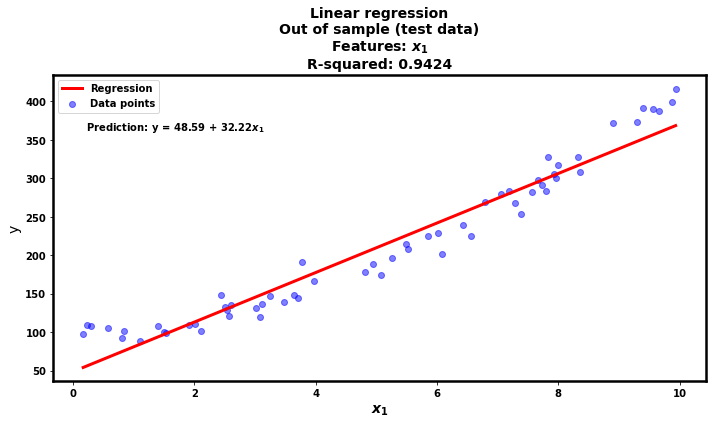

In [8]:
fig, ax = lr_demo.plot(model, y_test, X_test[:,[0] ], feature_names=["$x_1$"], 
                       title="Linear regression\nOut of sample (test data)\n",
                       showTrue=False)

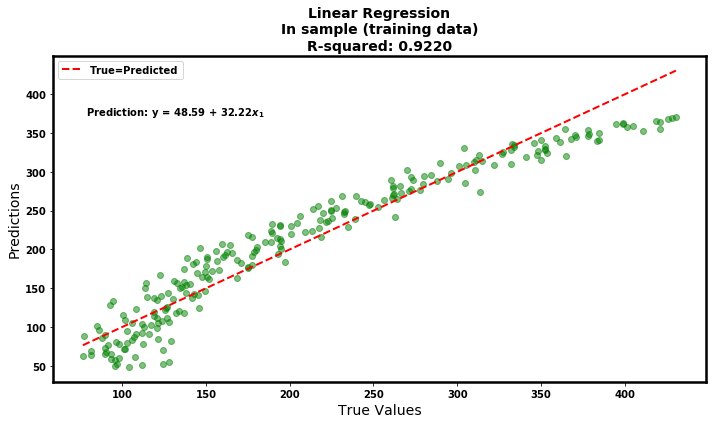

In [9]:
fig, ax =  lr_demo.plot_pred_vs_true(model, y_train, X_train[:,[0] ], feature_names=["$x_1$"], 
                                     title="Linear Regression\nIn sample (training data)\n")

And now, the Regression task
- on the same dataset
- solved by a different model: the Decision Tree Regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=3)

# Note: we access the single feature as X_train[:, [9]] rather than X_train[:, 0] to ensure the result is 2D
# - with a singlteon final dimension, as required by sklearn
_= dt_model.fit(X_train[:,[0] ], y_train)


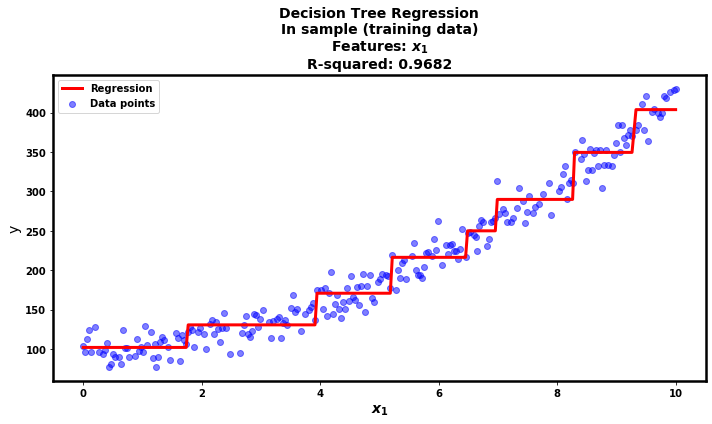

In [11]:
fig, ax = lr_demo.plot(dt_model, y_train, X_train[:,[0] ], feature_names=["$x_1$"], 
                       title="Decision Tree Regression\nIn sample (training data)\n",
                       showEquation=False,
                       showTrue=False)


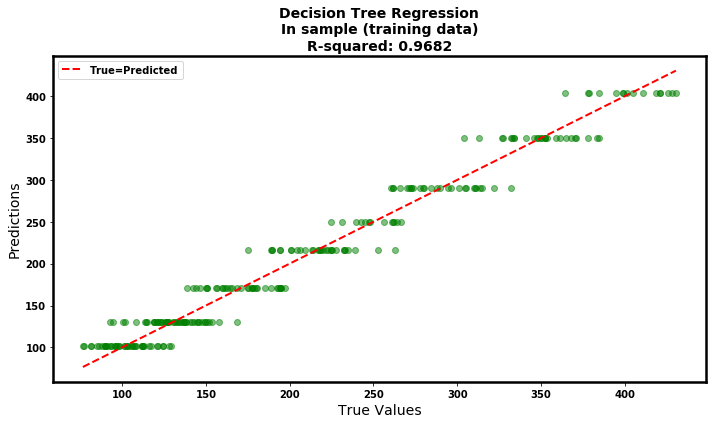

In [12]:
fig, ax =  lr_demo.plot_pred_vs_true(dt_model, y_train, X_train[:,[0] ], feature_names=["$x_1$"], showEquation=False, 
                                     title="Decision Tree Regression\nIn sample (training data)\n")

The Decision Tree model creates a more complex prediction
- divides the feature $x_1$ into regions
- predicts the average target (from *training examples*) as the target for *all* values in the same region

So how do we choose between multiple models for a task ?

One argument: use the model with the best Performance Metric
- our goal is good out of sample prediction

But the prediction for Decision Tree presents some issues
- complex.
    - Complexity can lead to over fitting: good in sample performance, but poor out of sample performance
- all test examples within a region have the *same prediction*
    - may violate economic principles: more is better
- the prediction can not be summarized simply (i.e., in an equation)
    - we need a tree of questions to represent the decision

Ultimately
- the use case for the prediction may inform the choice of model

# Why is Linear Regression so popular ?

Linear Regression is used very often, for a number of reasons.

First: 
- the prediction fits a functional form: Linear
- the equation succinctly *explains* the prediction in terms of the features

Moreover, the weights (coefficients) in the Linear Regression equation are *interpretable*.

Consider
$$
\hat y = \Theta \cdot \x
$$

Lets take the derivative of the prediction with respect to any feature, e.g., the $j^{th}$ feature

$$
\frac{\partial \hat\y}{\partial \x_j} = \Theta_j
$$

That is
- the weight/coefficient $\Theta_j$ associated with the  $j^{th}$ feature
- is the *marginal increase in prediction $\hat y$ for a unit increase in $\x_j$*

In our Housing Price prediction task
- we can use the coefficient of Size
- to predict how much the predicted Price will increase
- for each additional increase n Size

This advantage in interpretability often argues for using Linear Regression as the model for a Regression task
- we can test whether the sign of $\Theta_j$ conforms with economic intuition
    - it should be positive: bigger is costlier
- it is less of a "black box"

In [13]:
print("Done")

Done
